# Machine Learning Project

## Importing libraries

In [55]:
from matplotlib import pyplot as plt
import seaborn as sns
from fileinput import filename
import pandas as pd
import sklearn
import scipy


## Load and clear up dataset

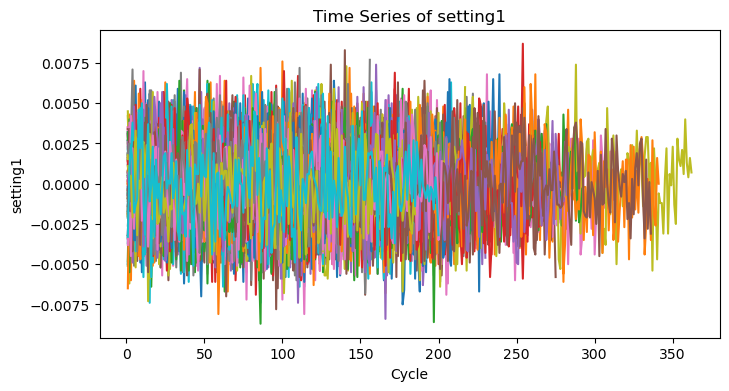

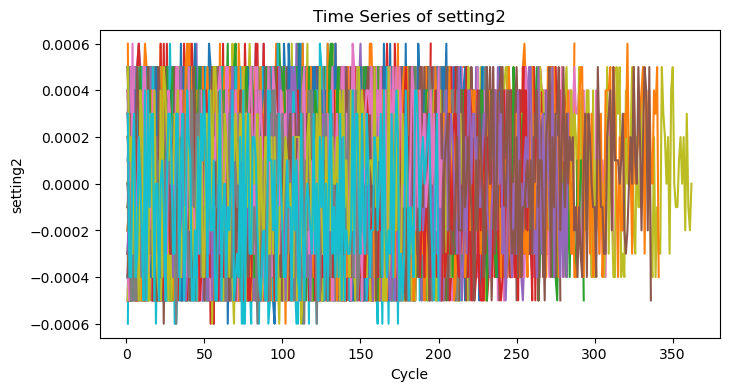

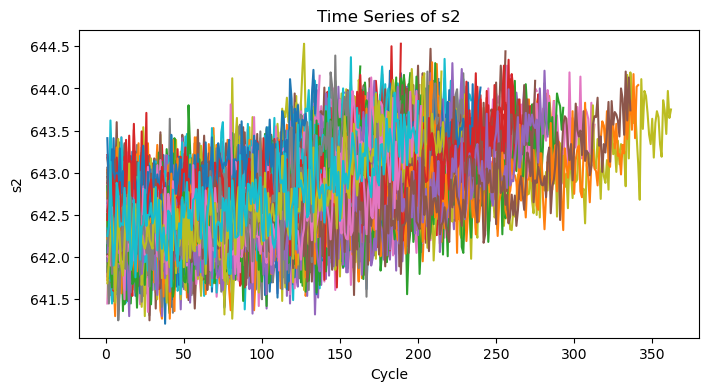

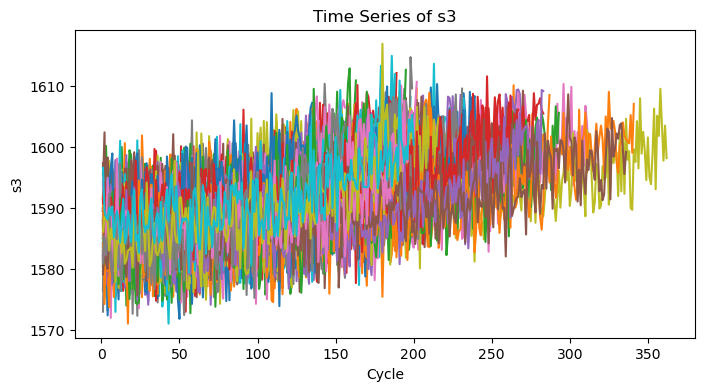

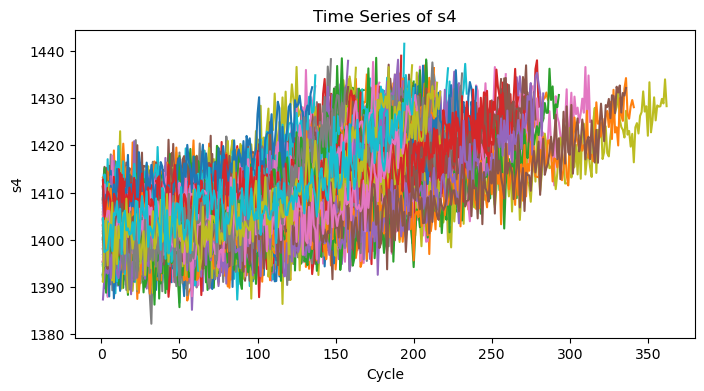

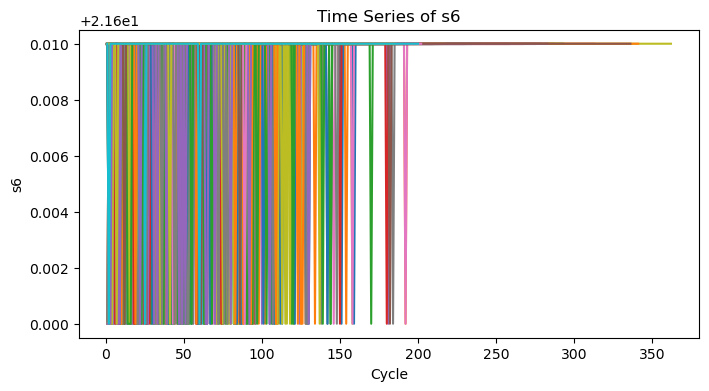

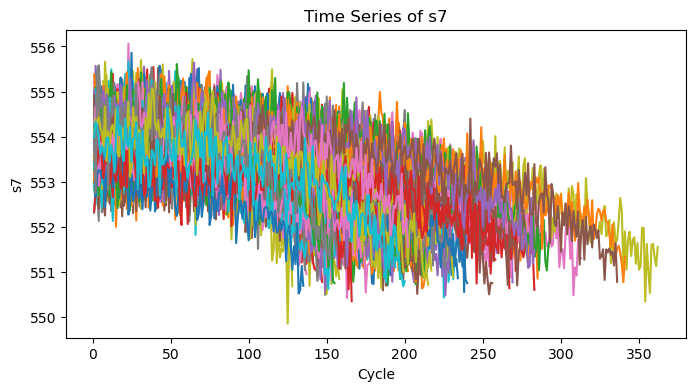

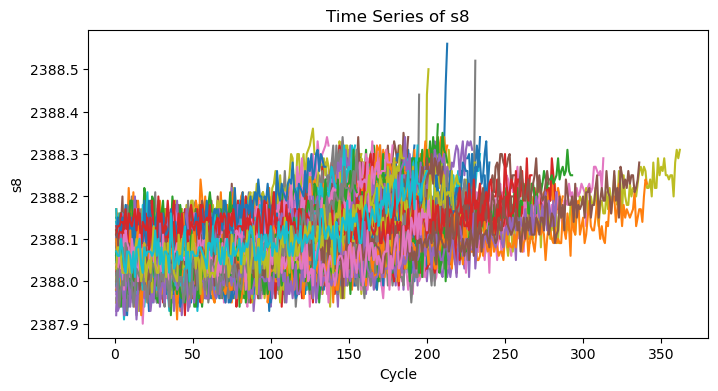

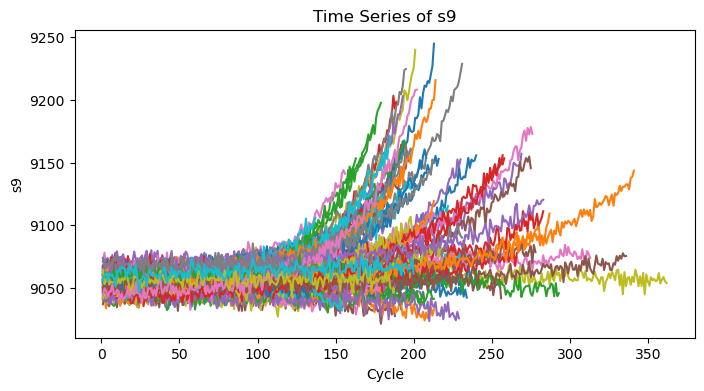

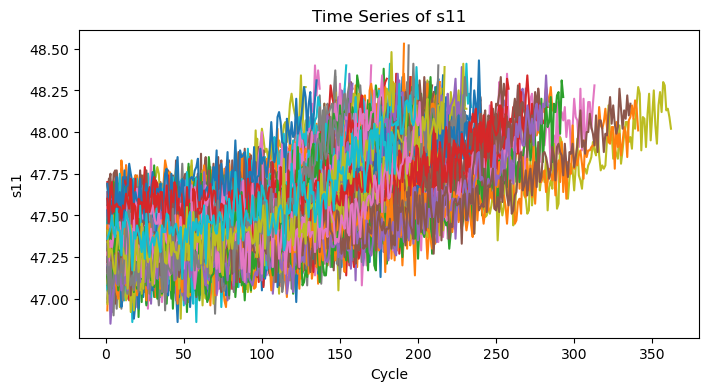

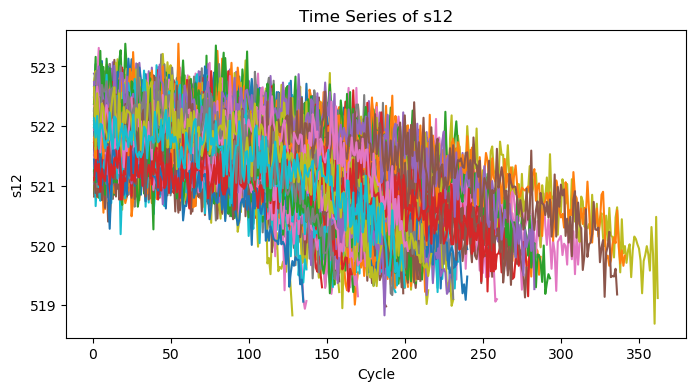

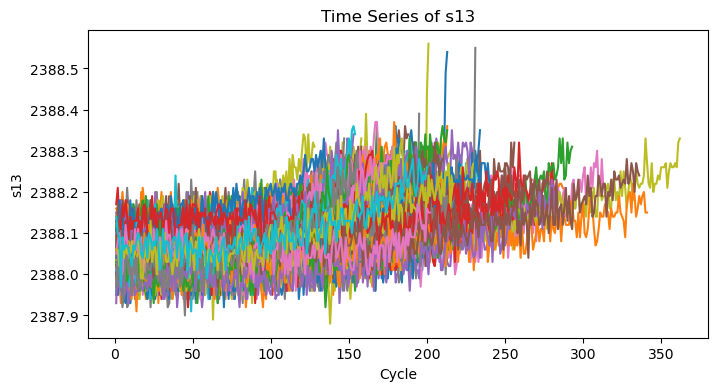

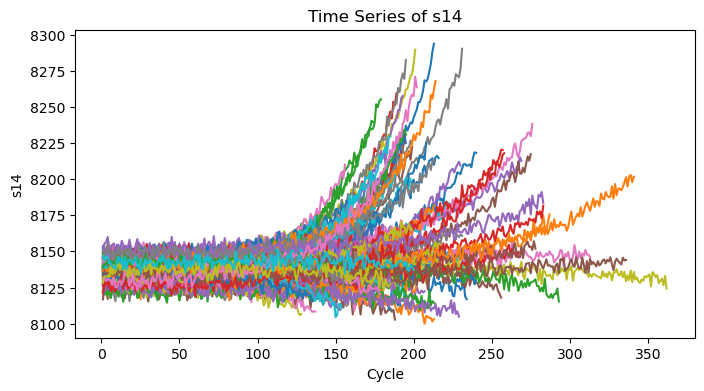

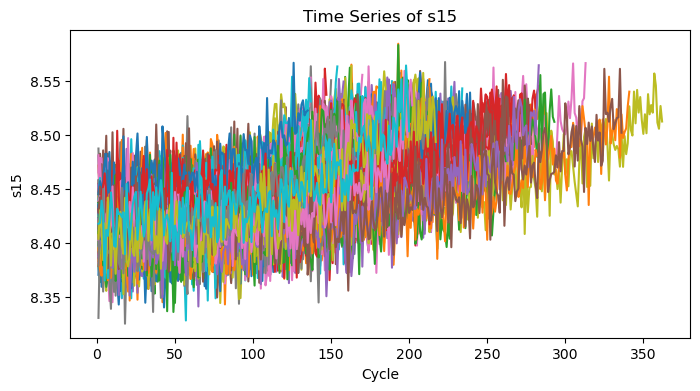

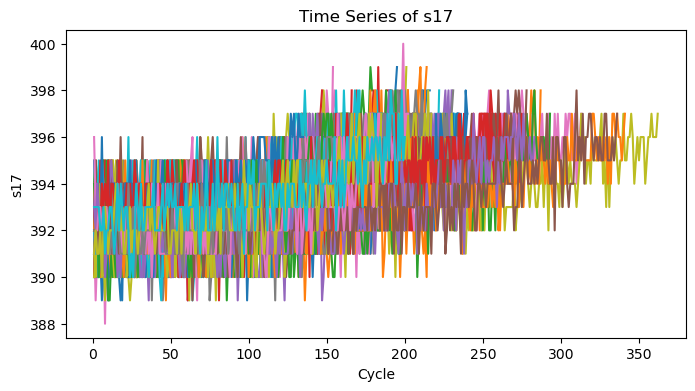

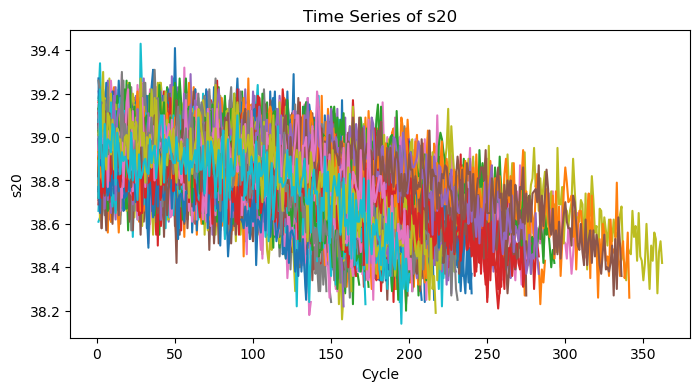

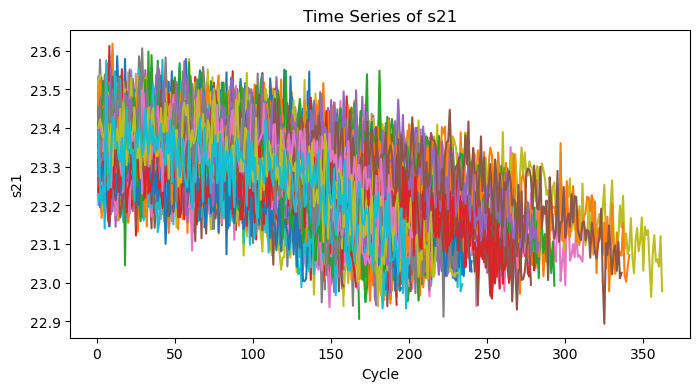

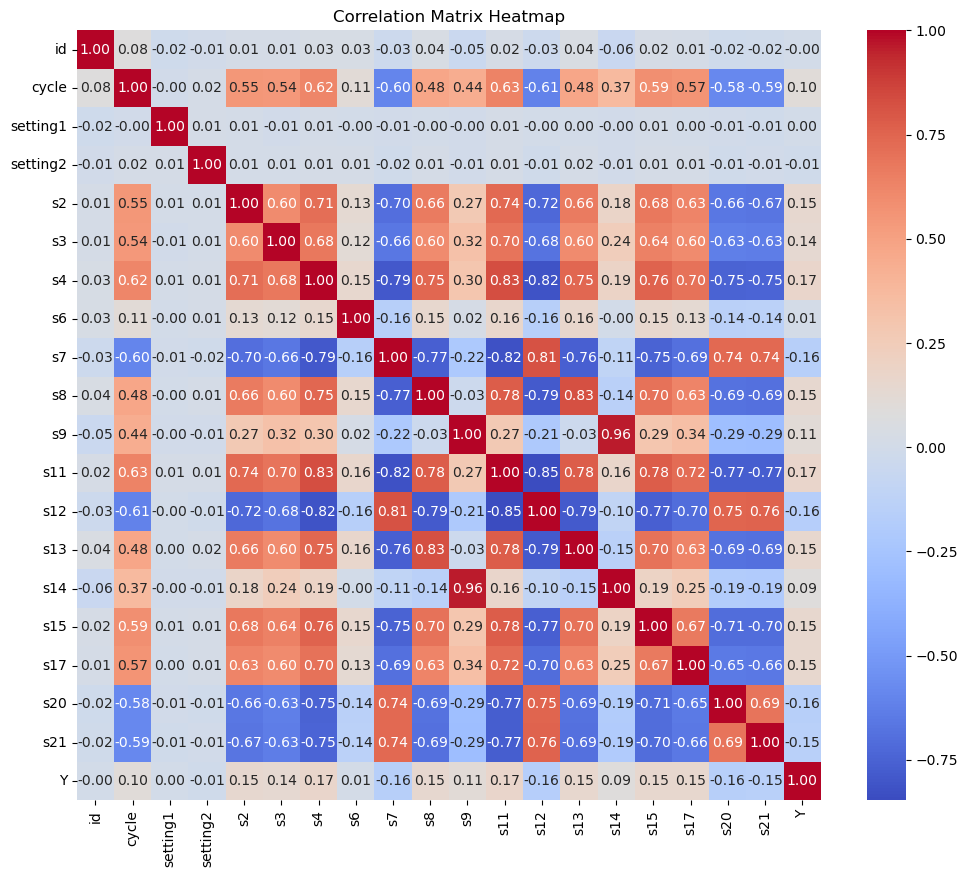

/opt/miniconda3/envs/Project/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


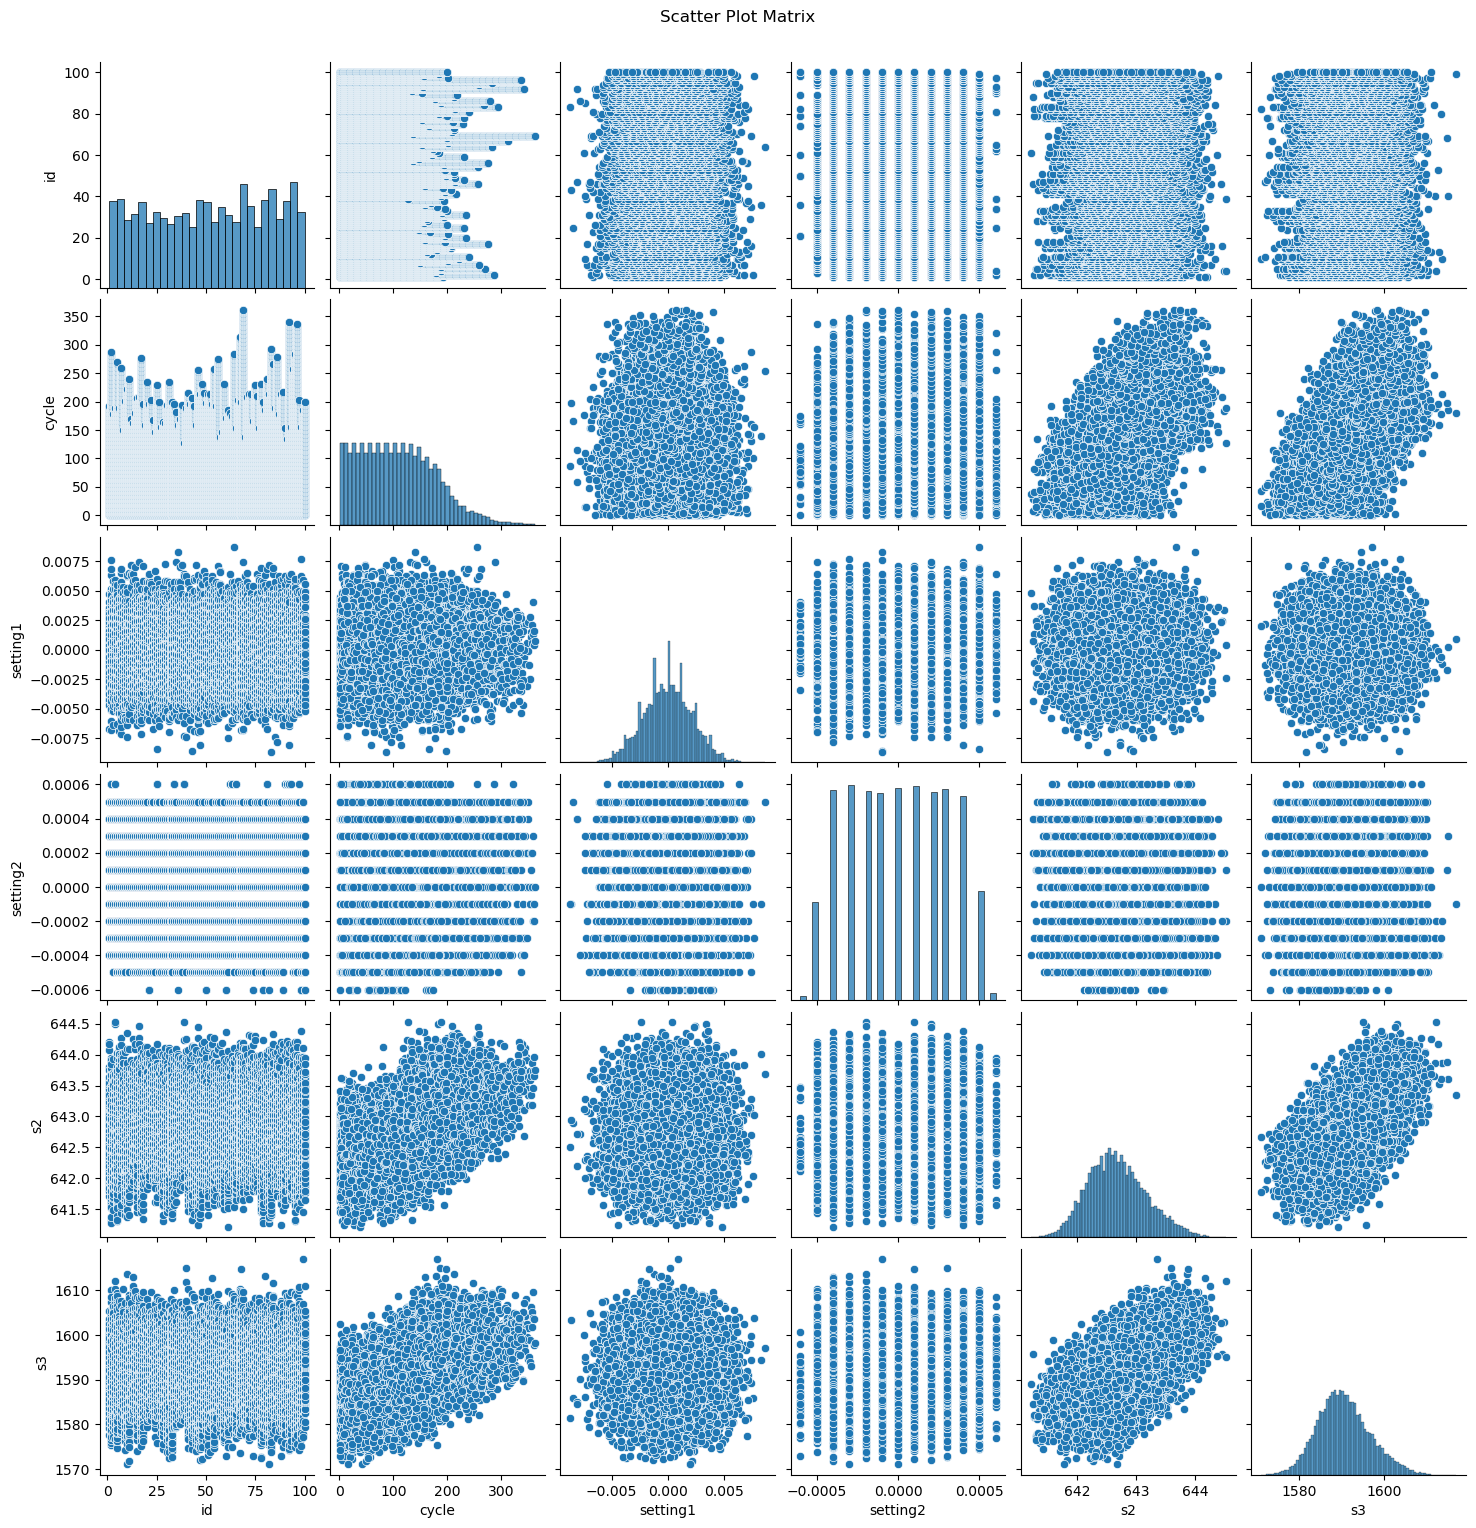

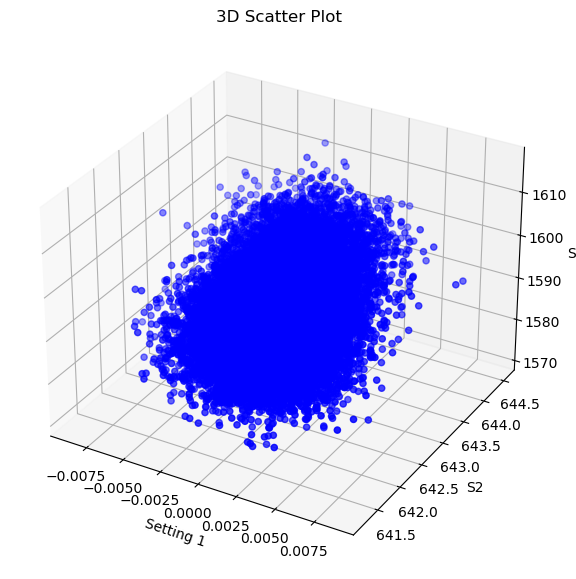

In [56]:
# Load the dataset
dataset = pd.read_csv("PM_train.csv")

# Shift the cycle column forward by 1 to identify the last cycle before it resets
dataset['Y'] = (dataset['cycle'] == dataset.groupby('id')['cycle'].transform('max')).astype(int)

# Define selected columns, including 'Y'
selected_columns = ['id', 'cycle', 'setting1', 'setting2', 's2', 's3', 's4', 's6', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20', 's21', 'Y']

# Select the subset of data
selected_dataset = dataset[selected_columns]

## Save the selected dataset to an Excel file
# selected_dataset.to_excel("selected_dataset_with_Y.xlsx", index=False)

# Visualization
for column in selected_columns:
    if column not in ['id', 'cycle', 'Y']:
        plt.figure(figsize=(8, 4))

        # Plot each 'id' separately to avoid overlapping sequences
        for unique_id in selected_dataset['id'].unique():
            subset = selected_dataset[selected_dataset['id'] == unique_id]
            plt.plot(subset['cycle'], subset[column], label=f'ID {unique_id}')

        plt.title(f'Time Series of {column}')
        plt.xlabel('Cycle')
        plt.ylabel(column)
        # plt.legend(loc='upper right', fontsize='small')
        plt.show()


# Select only numerical columns for correlation
numerical_data = selected_dataset.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Scatter plot matrix for selected columns
sns.pairplot(selected_dataset, vars=selected_columns[:6])  # Use the first few columns for clarity
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()


from mpl_toolkits.mplot3d import Axes3D

# Choose three variables to plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(selected_dataset['setting1'], selected_dataset['s2'], selected_dataset['s3'], c='b', marker='o')

# Label the axes
ax.set_xlabel('Setting 1')
ax.set_ylabel('S2')
ax.set_zlabel('S3')
plt.title('3D Scatter Plot')
plt.show()